In [75]:
import SimpleITK as sitk

reader = sitk.ImageFileReader()
reader.SetImageIO("NiftiImageIO")
reader.SetFileName('/Users/josephinebregazzi/Work/summer2023/work/Isles-22-Flair-Image-Preprocessing/sub-strokecase0002_ses-0001_flair.nii.gz')
image = reader.Execute()

#writer = sitk.ImageFileWriter()
#writer.SetFileName('/Users/josephinebregazzi/Work/summer2023/work/Isles-22-Flair-Image-Preprocessing/sub-strokecase0002_ses-0001_flair.nii.gz_1')
#writer.Execute(image)

In [76]:
print(type(image))

<class 'SimpleITK.SimpleITK.Image'>


In [77]:
print('Image info...\n')
print('Pixel at origin:', image.GetPixel(0, 0, 0))
print('Depth:\t\t', image.GetDepth())
print('Dimension:\t', image.GetDimension())
print('Size\t\t', image.GetSize())
print('Spacing:\t', image.GetSpacing())

Image info...

Pixel at origin: 0.0
Depth:		 352
Dimension:	 3
Size		 (281, 352, 352)
Spacing:	 (0.7115291953086853, 0.7102272510528564, 0.7102272510528564)


In [78]:
nda = sitk.GetArrayFromImage(image)
print(image.GetSize())
print(nda.shape)

(281, 352, 352)
(352, 352, 281)


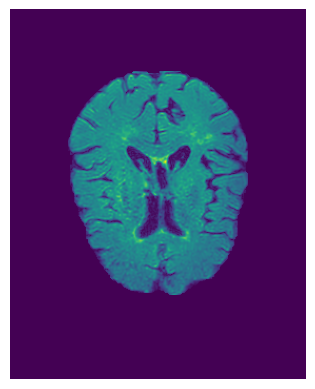

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

# upside down!!
plt.imshow(sitk.GetArrayViewFromImage(image[:, :, 235]))
plt.axis("off")
plt.show()

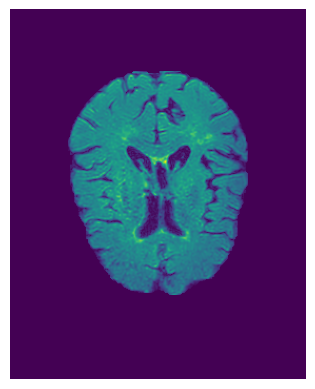

In [80]:
img1 = image[:, :, 235]

plt.imshow(sitk.GetArrayViewFromImage(img1))
plt.axis("off")
plt.show()

In [81]:
def display(image):
    plt.imshow(sitk.GetArrayViewFromImage(image))
    plt.axis("off")
    plt.show()

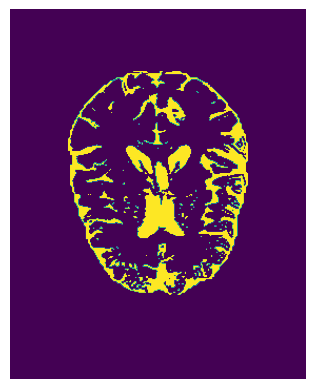

In [82]:
display((img1 > 1) + (img1 < 1000))

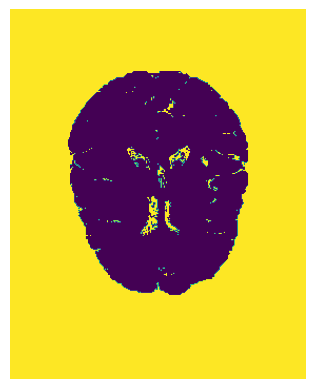

In [87]:
display(img1 > 170 + img1 < 350)

In [92]:
def displayRange(image, min, max):
    display((image >= min) + (image <= max))

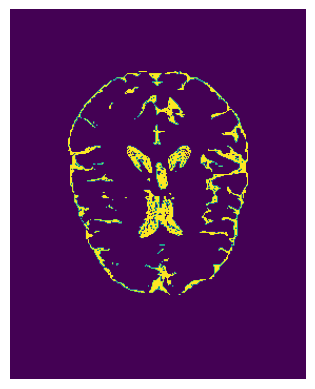

In [93]:
displayRange(img1, 100, 700)

# slices in nd array: 352
# slices in image array: 352


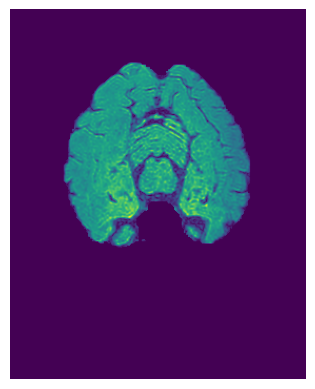

In [83]:
# Incorrect orientation for slices!!

slices_img = []
slices_nda = []

nda = sitk.GetArrayFromImage(image)


for i in range(352):
    cur_nda = nda[i]
    slices_nda.append(cur_nda)
    slices_img.append(sitk.GetImageFromArray(slices_nda[i]))
    
# depth: 352
# h x w: 352 x 281
print('# slices in nd array:', len(slices_nda))
print('# slices in image array:', len(slices_img))

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(slices_img[190]))
plt.axis("off")
plt.show()

In [84]:
#%matplotlib inline
#import matplotlib.pyplot as plt

#plt.imshow(sitk.GetArrayViewFromImage(image[100]))
#plt.axis("off")
#plt.show()